In [1]:
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=10,10


sys.path.append('/home/chris/src/provenance_py')

if __name__ == "__main__" and __package__ is None:
    __package__ = "provenance_lib"

from .parse import ProvDAG, ProvNode, Config


In [2]:
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
G.nodes


NodeView((1, 2, 3))

In [3]:
H = nx.DiGraph(G)
G.nodes

NodeView((1, 2, 3))

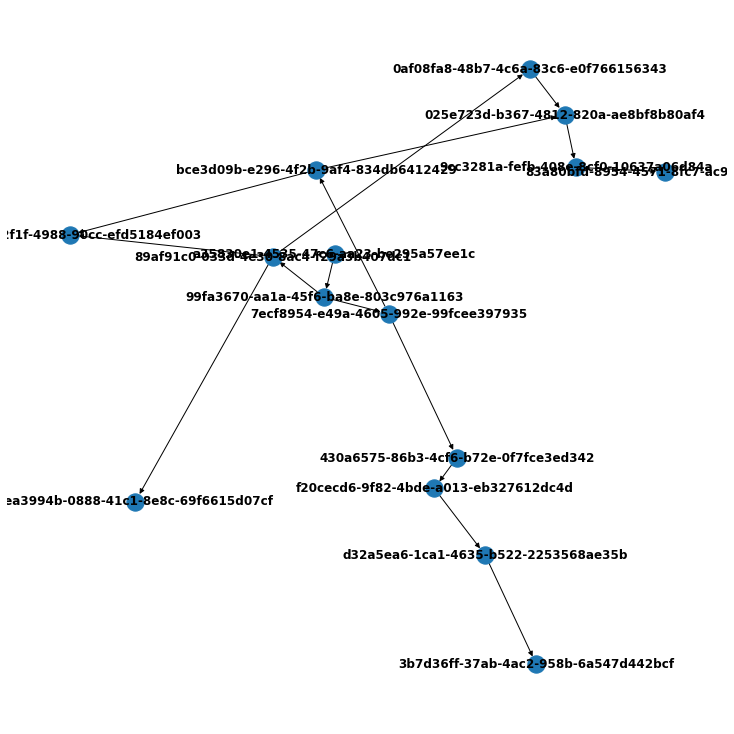

In [6]:
cwd = os.getcwd()
DATA_DIR = os.path.join(cwd, '../tests/data')
qzv = os.path.join(DATA_DIR, 'v5_uu_emperor.qzv')
cfg = Config()
dag = ProvDAG(cfg=cfg, archive_fp=qzv)
contents = dag.parser_results.archive_contents
nodes = list(contents.values())
nx.draw(dag.dag, with_labels=True, font_weight="bold")

In [5]:
ffb = 'ffb7cee3-2f1f-4988-90cc-efd5184ef003'
nested_nodes = dag.get_nested_provenance_nodes(ffb)
print(nested_nodes)

{'ffb7cee3-2f1f-4988-90cc-efd5184ef003', 'a35830e1-4535-47c6-aa23-be295a57ee1c', '99fa3670-aa1a-45f6-ba8e-803c976a1163', 'bce3d09b-e296-4f2b-9af4-834db6412429', '7ecf8954-e49a-4605-992e-99fcee397935', '89af91c0-033d-4e30-8ac4-f29a3b407dc1'}


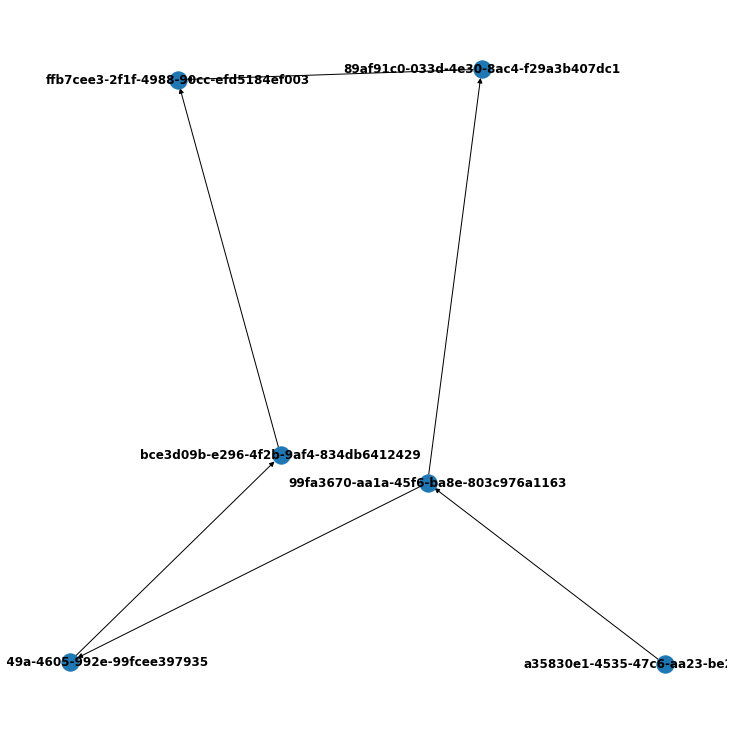

In [8]:
view = nx.subgraph_view(dag.dag, filter_node = lambda x: x in nested_nodes)
nx.draw(view, with_labels=True, font_weight="bold")

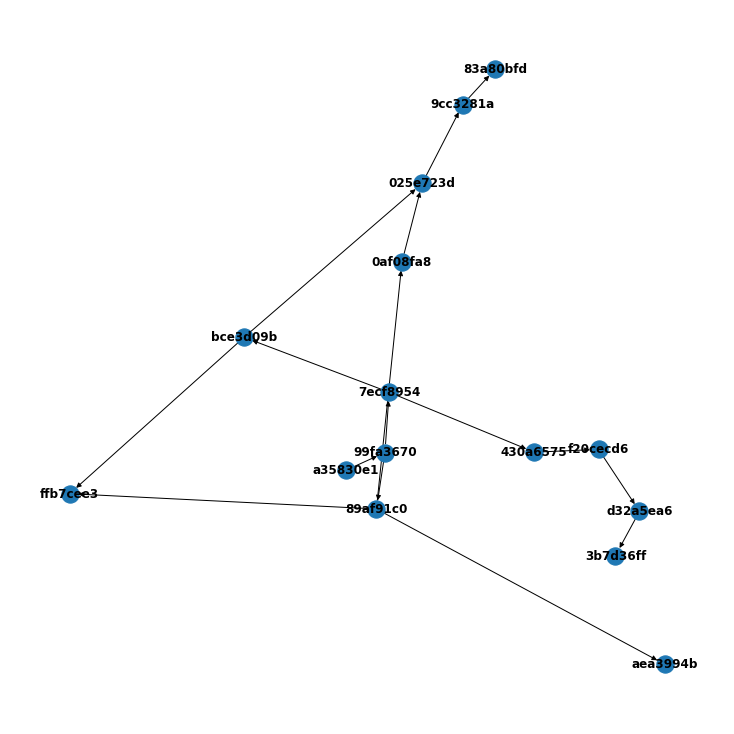

In [10]:
# Relabel nodes for readability
labels = {node: node[:8] for node in dag.nodes}
nx.relabel_nodes(dag.dag, labels, copy=False)
nx.draw(dag.dag, with_labels=True, font_weight="bold")